# <center>United States Unemployment Data Analysis</center>


# Introduction
We decided to do our project on the United States unemployment and got our unemployment data set from 

United States Department of Agriculture
Economic Research Service
<br>https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/. 

We also added the US Census data from the Census Bureau<br> https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk to compare the census with unemployment.

As we look through the datasets, we were able to ask and answer these questions:
1. <b> Which states have the highest and lowest unemployment rate in 2017? </b>
2. <b> Which region have the highest and lowest unemployment rate in 2017? </b>
3. <b> Which states has the highest and lowest median household income in 2017? </b>
4. <b> What land factors can indicate a higher unemployment rate? </b>
5. <b> Is there a significant change in unemployment rate over the course of 5 years?  </b>
6. <b> Is the unemployment and civilian labor force correlated?</b>
7. <b> Is unemployment changing over time? </b>
8. <b> Is there a difference in median household income between Coastal and Landlocked states?</b>
9. <b> Is there a difference in unemployment rate between Coastal and Landlocked states? </b>

### We started by importing libraries that we are going to use in jupyter notebook

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd 

#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
 
#choropleth maps
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

sns.set() #set default seaborn style

#To display graphs and save them in jupyter notebook
%matplotlib inline 

#code to hide warning messages in jupyter notebook
import warnings
warnings.filterwarnings("ignore")

# Importing Data
Load the excel and csv files into a dataframe.

In [2]:
#Read the unemployement excel file as a data frame called df, skipped source citation by starting the header at 7
df = pd.read_excel('data/Unemployment.xls',header=7)

#Imported the census dataframe and named it dfCensus and started the header at 1 
dfCensus = pd.read_csv('data/USA_Census_2010.csv', header=1)

In [3]:
#Displayed the column number and first 5 rows of the unemployment dataframe
df.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,60336.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,48193.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,58343.0,121.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,56607.0,117.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,32490.0,67.4


Displaying the top 5 rows of the df dataframe.

In [4]:
#Displayed the columns and first 5 rows of the census dataframe
dfCensus.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,0100000US,NaN,United States,0100000US,NaN,United States,United States,308745538(r38234),131704730(r15031),3796742.23,264836.79,3531905.43,87.4,37.3
1,0100000US,NaN,United States,0400000US01,1.0,United States - Alabama,Alabama,4779736(r38235),2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
2,0100000US,NaN,United States,0400000US02,2.0,United States - Alaska,Alaska,710231(r38823),306967(r15611),665384.04,94743.10,570640.95,1.2,0.5
3,0100000US,NaN,United States,0400000US04,4.0,United States - Arizona,Arizona,6392017,2844526,113990.30,396.22,113594.08,56.3,25.0
4,0100000US,NaN,United States,0400000US05,5.0,United States - Arkansas,Arkansas,2915918(r39193),1316299(r15934),53178.55,1143.07,52035.48,56.0,25.3


Displaying the top 5 rows of the dfCensus dataframe.

In [5]:
#used to view some basic statistical details like percentile, mean, std etc. of a data frame
df.describe()

,FIPS,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
count,3275.000000,3219.000000,3219.000000,3222.000000,3.270000e+03,3.270000e+03,3.270000e+03,3270.000000,3.270000e+03,3.270000e+03,...,3.272000e+03,3.272000e+03,3.272000e+03,3272.000000,3.272000e+03,3.272000e+03,3.272000e+03,3272.000000,3193.000000,3192.000000
mean,31336.829618,4.938490,5.189811,0.382992,1.404735e+05,1.339245e+05,6.548974e+03,5.064098,1.418885e+05,1.336257e+05,...,1.476203e+05,1.411479e+05,6.472416e+03,4.796167,1.488660e+05,1.430321e+05,5.833820e+03,4.296608,51240.013780,89.256579
std,16321.509704,2.724553,3.506942,0.486192,2.719376e+06,2.593454e+06,1.260071e+05,2.124528,2.747659e+06,2.588141e+06,...,2.864848e+06,2.739867e+06,1.250240e+05,2.170851,2.889444e+06,2.776751e+06,1.127306e+05,1.884719,13498.361416,19.945239
min,0.000000,1.000000,1.000000,0.000000,4.100000e+01,3.800000e+01,3.000000e+00,1.500000,4.300000e+01,4.000000e+01,...,1.000000e+02,9.500000e+01,5.000000e+00,1.500000,1.020000e+02,9.800000e+01,4.000000e+00,1.300000,22679.000000,39.900000
25%,19022.000000,2.000000,2.000000,0.000000,5.293000e+03,5.033000e+03,2.612500e+02,3.700000,5.322500e+03,4.991500e+03,...,5.024250e+03,4.748750e+03,2.327500e+02,3.500000,5.023750e+03,4.785000e+03,2.120000e+02,3.175000,42437.000000,76.200000
50%,30019.000000,6.000000,5.000000,0.000000,1.240550e+04,1.172350e+04,6.500000e+02,4.700000,1.248900e+04,1.168350e+04,...,1.174300e+04,1.116900e+04,5.700000e+02,4.400000,1.179200e+04,1.125450e+04,5.095000e+02,3.900000,49070.000000,86.500000
75%,46100.000000,7.000000,8.000000,1.000000,3.314600e+04,3.161700e+04,1.720750e+03,5.800000,3.338800e+04,3.147725e+04,...,3.309925e+04,3.170250e+04,1.568250e+03,5.400000,3.345750e+04,3.193050e+04,1.373250e+03,4.900000,56979.000000,99.800000
max,72153.000000,9.000000,12.000000,1.000000,1.521911e+08,1.451561e+08,7.034959e+06,20.400000,1.537611e+08,1.448604e+08,...,1.602739e+08,1.532938e+08,6.980076e+06,20.600000,1.616405e+08,1.553440e+08,6.296445e+06,19.900000,136191.000000,251.400000


Display some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values of the df dataframe.

In [6]:
#used to view some basic statistical details like percentile, mean, std etc. of a data frame
dfCensus.describe()

,Id2,Target Geo Id2,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
count,0.0,52.000000,5.300000e+01,53.000000,5.300000e+01,53.000000,53.000000
mean,NaN,29.788462,1.433738e+05,10029.710755,1.333440e+05,392.079245,180.539623
std,NaN,16.774557,5.203228e+05,38273.267108,4.832248e+05,1354.733178,666.066503
min,NaN,1.000000,6.834000e+01,7.290000,6.105000e+01,1.200000,0.500000
25%,NaN,16.750000,3.537974e+04,701.060000,3.084292e+04,48.500000,23.400000
50%,NaN,29.500000,5.627281e+04,1508.500000,5.362476e+04,101.200000,43.400000
75%,NaN,42.500000,8.489688e+04,4509.090000,8.175872e+04,231.100000,89.000000
max,NaN,72.000000,3.796742e+06,264836.790000,3.531905e+06,9856.500000,4860.400000


Display some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values of the dfCensus dataframe.

In [7]:
#used to get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 56 columns):
FIPS                                         3275 non-null int64
State                                        3275 non-null object
Area_name                                    3275 non-null object
Rural_urban_continuum_code_2013              3219 non-null float64
Urban_influence_code_2013                    3219 non-null float64
Metro_2013                                   3222 non-null float64
Civilian_labor_force_2007                    3270 non-null float64
Employed_2007                                3270 non-null float64
Unemployed_2007                              3270 non-null float64
Unemployment_rate_2007                       3270 non-null float64
Civilian_labor_force_2008                    3270 non-null float64
Employed_2008                                3270 non-null float64
Unemployed_2008                              3270 non-null float64
Unemployment_rate_2008    

Display the number of non-NA/null value across the row axis, data type of the column and total number of columns.

In [8]:
#used to get a concise summary of the dataframe
dfCensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 14 columns):
Id                                                      53 non-null object
Id2                                                     0 non-null float64
Geography                                               53 non-null object
Target Geo Id                                           53 non-null object
Target Geo Id2                                          52 non-null float64
Geographic area                                         53 non-null object
Geographic area.1                                       53 non-null object
Population                                              53 non-null object
Housing units                                           53 non-null object
Area in square miles - Total area                       53 non-null float64
Area in square miles - Water area                       53 non-null float64
Area in square miles - Land area                        53 non-null f

Display the number of non-NA/null value across the row axis, data type of the column and total number of columns.

# Data Cleaning and Organizing
Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

We noticed our data is gigantic- massive in both data and columns. We needed to trim our data set down to 50 states and noticed that every thousands of a number in the data set reference the entire state. We then used a function and named it states_only (modulus function), to keep the FIPS rows that should return a dataframe containing only state values.

In [9]:
#Created a state_only function to narrow our data set down to 50 states.
def states_only(data):
    #Returns a dataframe only containing state values
    #must have import numpy as np
    # '0' = US so we also excluded it
    tempdf = data[(data['FIPS']%1000 == 0) & (data['FIPS'] != 0)]
    #return the new dataframe
    return tempdf


In [10]:
#Enter the dataframe into the function to return just the states and removed regions.
df=states_only(df)
df.head(10)

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,48193.0,100.0
69,2000,AK,Alaska,NaN,NaN,NaN,350785.0,328579.0,22206.0,6.3,...,360759.0,335682.0,25077.0,7.0,356886.0,333375.0,23511.0,6.6,74058.0,100.0
102,4000,AZ,Arizona,NaN,NaN,NaN,3034016.0,2917117.0,116899.0,3.9,...,3327949.0,3165127.0,162822.0,4.9,3439755.0,3273550.0,166205.0,4.8,56508.0,100.0
118,5000,AR,Arkansas,NaN,NaN,NaN,1369284.0,1296572.0,72712.0,5.3,...,1347630.0,1297652.0,49978.0,3.7,1351496.0,1301459.0,50037.0,3.7,45916.0,100.0
194,6000,CA,California,NaN,NaN,NaN,17893080.0,16931590.0,961490.0,5.4,...,19205295.0,18285492.0,919803.0,4.8,19398212.0,18582802.0,815410.0,4.2,71785.0,100.0
253,8000,Co,Colorado,NaN,NaN,NaN,2664677.0,2565218.0,99459.0,3.7,...,2992412.0,2911079.0,81333.0,2.7,3096358.0,2994752.0,101606.0,3.3,69113.0,100.0
318,9000,CT,Connecticut,NaN,NaN,NaN,1856209.0,1773159.0,83050.0,4.5,...,1896938.0,1807506.0,89432.0,4.7,1905312.0,1827070.0,78242.0,4.1,74428.0,100.0
327,10000,DE,Delaware,NaN,NaN,NaN,443573.0,428312.0,15261.0,3.4,...,476844.0,455489.0,21355.0,4.5,482465.0,464337.0,18128.0,3.8,64085.0,100.0
331,11000,DC,District of Columbia,NaN,NaN,NaN,322237.0,304426.0,17811.0,5.5,...,401450.0,377153.0,24297.0,6.1,404610.0,382140.0,22470.0,5.6,80153.0,100.0
333,12000,FL,Florida,NaN,NaN,NaN,9157124.0,8789770.0,367354.0,4.0,...,10093451.0,9669228.0,424223.0,4.2,10234770.0,9869673.0,365097.0,3.6,52582.0,100.0


Displaying the first 10 rows of the df dataframe after running the dataset through the state_only function. We notice there are uncapitalized state codes.

In [11]:
#The data has some uncapitalized State Codes, which can cause errors as shown by the first 10 rows.
df[['State']].head(10)

,State
1,AL
69,AK
102,AZ
118,AR
194,CA
253,Co
318,CT
327,DE
331,DC
333,FL


We can see the abbreviation of Colorado is not fully capitalized.

In [12]:
#Change the States column string to upper case
df['State'] = df['State'].str.upper()

#Pull up the states column to make sure they are captilized
df[['State']].head(10)

,State
1,AL
69,AK
102,AZ
118,AR
194,CA
253,CO
318,CT
327,DE
331,DC
333,FL


Used the str.upper() and changed the State column into consistent capital letters. We then notice 'PR' and 'DC' that is not consider one of the 50 States appear in our dataset, making the column total = 52 instead of 50.

In [13]:
#list indices of non US state rows and set them into nonStateIndices
nonStateIndices = df[(df['State'] == 'PR') | (df['State'] == 'DC')].index
print(df[(df['State'] == 'PR') | (df['State'] == 'DC')])

       FIPS State             Area_name  Rural_urban_continuum_code_2013  \
331   11000    DC  District of Columbia                              NaN   
3196  72000    PR           Puerto Rico                              NaN   

      Urban_influence_code_2013  Metro_2013  Civilian_labor_force_2007  \
331                         NaN         NaN                   322237.0   
3196                        NaN         NaN                  1387359.0   

      Employed_2007  Unemployed_2007  Unemployment_rate_2007  ...  \
331        304426.0          17811.0                     5.5  ...   
3196      1232266.0         155093.0                    11.2  ...   

      Civilian_labor_force_2017  Employed_2017  Unemployed_2017  \
331                    401450.0       377153.0          24297.0   
3196                  1096133.0       977331.0         118802.0   

      Unemployment_rate_2017  Civilian_labor_force_2018  Employed_2018  \
331                      6.1                   404610.0       38

Verify the 2 rows's identity is Puerto Rico and District of Columbia and is unnecessary in dataset.

In [14]:
#drop PR and DC by using nonStateIndices and committing the change with inplace to keep changes.
df.drop(nonStateIndices, inplace=True)
#Display the new states
df[['State']]

,State
1,AL
69,AK
102,AZ
118,AR
194,CA
253,CO
318,CT
327,DE
333,FL
401,GA


In [15]:
df.shape

(50, 56)

Drop DC and PR and verify that only 50 states are listed shown by the rows using shape.

In [16]:
#Add the state area sizes into the dataframe df by merging the unemployment and census dataframes.
#Both dataframes have state codes as a common column
df = pd.merge(left=df,right=dfCensus, how='left', left_on='Area_name', right_on='Geographic area.1')
#This column will be a duplicate that was used to left join merge, so it is removed:
df = df.drop(columns='Geographic area.1')
df.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Target Geo Id,Target Geo Id2,Geographic area,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,0400000US01,1.0,United States - Alabama,4779736(r38235),2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
1,2000,AK,Alaska,NaN,NaN,NaN,350785.0,328579.0,22206.0,6.3,...,0400000US02,2.0,United States - Alaska,710231(r38823),306967(r15611),665384.04,94743.10,570640.95,1.2,0.5
2,4000,AZ,Arizona,NaN,NaN,NaN,3034016.0,2917117.0,116899.0,3.9,...,0400000US04,4.0,United States - Arizona,6392017,2844526,113990.30,396.22,113594.08,56.3,25.0
3,5000,AR,Arkansas,NaN,NaN,NaN,1369284.0,1296572.0,72712.0,5.3,...,0400000US05,5.0,United States - Arkansas,2915918(r39193),1316299(r15934),53178.55,1143.07,52035.48,56.0,25.3
4,6000,CA,California,NaN,NaN,NaN,17893080.0,16931590.0,961490.0,5.4,...,0400000US06,6.0,United States - California,37253956,13680081,163694.74,7915.52,155779.22,239.1,87.8


Display the first 5 rows of the df dataframe after merging the two datasets into one df dataframe.

### Drop columns that would not be used.
*** Note *** Code must run top to bottom otherwise we will be dropping columns that doesn't exist anymore.

In [17]:
#Dropping columns that are not used or unnecessary for this analysis.
df.drop(['Rural_urban_continuum_code_2013',
        'Urban_influence_code_2013',
        'Metro_2013',
        'Unemployed_2007',
        'Employed_2007',
        'Unemployed_2008',
        'Employed_2008',
        'Unemployed_2009',
        'Employed_2009',
        'Unemployed_2010',
        'Employed_2010',
        'Unemployed_2011',
        'Employed_2011',
        'Unemployed_2012',
        'Employed_2012',
        'Unemployed_2013',
        'Employed_2013',
        'Unemployed_2014',
        'Employed_2014',
        'Unemployed_2015',
        'Employed_2015',
        'Unemployed_2016',
        'Employed_2016',
        'Unemployed_2017',
        'Employed_2017',
        'FIPS',
        'Unemployed_2018',
        'Employed_2018',
        'Target Geo Id',
        'Target Geo Id2',
        'Geographic area',
        'Id',
        'Id2',
        'Geography',
        'Med_HH_Income_Percent_of_State_Total_2017'
        ], axis=1, inplace=True) # axis=1 for columns, inplace to keep changes

In [18]:
#Rename column names to better fit inside the notebook chart column labels
renamedColumns = {'Area_name':'Area name',
                'Civilian_labor_force_2007':'Civilian labor force 2007',
                'Unemployment_rate_2007':'Unemployment rate 2007',
                'Civilian_labor_force_2008':'Civilian labor force 2008',
                'Unemployment_rate_2008':'Unemployment rate 2008',
                'Civilian_labor_force_2009':'Civilian labor force 2009',
                'Unemployment_rate_2009':'Unemployment rate 2009',
                'Civilian_labor_force_2010':'Civilian labor force 2010',
                'Unemployment_rate_2010':'Unemployment rate 2010',
                'Civilian_labor_force_2011':'Civilian labor force 2011',
                'Unemployment_rate_2011':'Unemployment rate 2011',
                'Civilian_labor_force_2012':'Civilian labor force 2012',
                'Unemployment_rate_2012':'Unemployment rate 2012',
                'Civilian_labor_force_2013':'Civilian labor force 2013',
                'Unemployment_rate_2013':'Unemployment rate 2013',
                'Civilian_labor_force_2014':'Civilian labor force 2014',
                'Unemployment_rate_2014':'Unemployment rate 2014',
                'Civilian_labor_force_2015':'Civilian labor force 2015',
                'Unemployment_rate_2015':'Unemployment rate 2015',
                'Civilian_labor_force_2016':'Civilian labor force 2016',
                'Unemployment_rate_2016':'Unemployment rate 2016',
                'Civilian_labor_force_2017':'Civilian labor force 2017',
                'Unemployment_rate_2017':'Unemployment rate 2017',
                'Civilian_labor_force_2018':'Civilian labor force 2018',
                'Unemployment_rate_2018':'Unemployment rate 2018',
                'Median_Household_Income_2017':'Median Household Income 2017'
                 }

#changing column names
df.rename(columns=renamedColumns, inplace=True)
#display the data frame 
df.head()

,State,Area name,Civilian labor force 2007,Unemployment rate 2007,Civilian labor force 2008,Unemployment rate 2008,Civilian labor force 2009,Unemployment rate 2009,Civilian labor force 2010,Unemployment rate 2010,...,Civilian labor force 2018,Unemployment rate 2018,Median Household Income 2017,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,AL,Alabama,2175612.0,4.0,2176489.0,5.7,2162999.0,11.0,2196042.0,10.5,...,2198837.0,3.9,48193.0,4779736(r38235),2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
1,AK,Alaska,350785.0,6.3,356109.0,6.7,359647.0,7.7,361913.0,7.9,...,356886.0,6.6,74058.0,710231(r38823),306967(r15611),665384.04,94743.10,570640.95,1.2,0.5
2,AZ,Arizona,3034016.0,3.9,3104863.0,6.2,3128110.0,9.9,3089705.0,10.4,...,3439755.0,4.8,56508.0,6392017,2844526,113990.30,396.22,113594.08,56.3,25.0
3,AR,Arkansas,1369284.0,5.3,1375257.0,5.5,1358911.0,7.8,1353338.0,8.2,...,1351496.0,3.7,45916.0,2915918(r39193),1316299(r15934),53178.55,1143.07,52035.48,56.0,25.3
4,CA,California,17893080.0,5.4,18178123.0,7.3,18215140.0,11.2,18336271.0,12.2,...,19398212.0,4.2,71785.0,37253956,13680081,163694.74,7915.52,155779.22,239.1,87.8


Display the first 5 rows of the df dataframe with column names renamed to removed the undersore.

In [19]:
#check data before it is cleaned
df[['State','Population','Housing units']].head()

,State,Population,Housing units
0,AL,4779736(r38235),2171853(r15032)
1,AK,710231(r38823),306967(r15611)
2,AZ,6392017,2844526
3,AR,2915918(r39193),1316299(r15934)
4,CA,37253956,13680081


Display the first 5 rows of the state, population and housing units to check the data.

In [20]:
#Drop the columns that contain NaN values by using dropna and inplace to commit the changes. Added a 
#threshold condition that if the column contained at least 1 non NaN then the column wouldn't be dropped.
df.dropna(thresh=1,axis=1, inplace = True)

#We noticed that the Population and Housing Unit columns have revision codes in their numbers
#They look like '(r15032)' after their actual numbers. We have to remove them.
def remove_revision_code(string):
    #this function looks for the opening parenthesis and closing parenthesis to parse the int
    # ultimately removing the Census 2010 revision code in the data value
    
    #Variable to store indices of the parentheses
    endIndex = 0
    #loop for leftside index
    #argument converted to string to ensure function works on data that has been cleaned already
    for character in str(string):
        if character == '(':
            #break to get the leftsidelast index where the value is not a value anymore
            break
        endIndex += 1
        #if there is no parenthesis, then the whole string gets read and still converted to int
    return int(str(string)[:endIndex])

In [21]:
#Fixing values in Population and Housing units to allow data type change
#The function to remove the original data's revision codes are applied here
for index in range(df.shape[0]):
    df.loc[index,'Population'] = remove_revision_code(df.loc[index,'Population'])
    df.loc[index,'Housing units'] = remove_revision_code(df.loc[index,'Housing units'])

#Check the columns for cleaned data
df[['Population','Housing units']].head()

,Population,Housing units
0,4779736,2171853
1,710231,306967
2,6392017,2844526
3,2915918,1316299
4,37253956,13680081


Display the first 5 rows of the df dataframe with population and housing unit columns to see if the extra values were removed.

In [22]:
#Adding a column to categorize the states into coastal states or non-coastal
#Create the column for the category 'Coastal or Landlocked' with default values first
df['Coastal or Landlocked']= ['Landlocked']*df.shape[0]
for state in df['State']:
    #States that are coastal will be categorized as coastal
    if state in {'OR','WA','CA','AK','HI','TX','LA','MS','AL','FL','GA','SC','NC','VA','MD','DE','NJ','NY',
                 'CT','RI','MA','VT','ME'}:
        #You can change the value of a specific row and column, but you must select row by index number
        df.loc[[df[df['State']==state].index[0]],'Coastal or Landlocked'] = 'Coastal'
    #States that aren't in the previous list will be categorized as landlocked as a default
    else:
        df.loc[[df[df['State']==state].index[0]],'Coastal or Landlocked'] = 'Landlocked'

        
df[['State','Coastal or Landlocked']].head()


,State,Coastal or Landlocked
0,AL,Coastal
1,AK,Coastal
2,AZ,Landlocked
3,AR,Landlocked
4,CA,Coastal


Display the first 5 rows of the newly added coastal or landlocked column.

In [23]:
#Regions are determined by this URL: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
#Adding a column to categorize the states into regions
#Create the column for the category 'Region' with default values first
df['Region']= ['Non-Mainland']*df.shape[0]
#Defining the states into region lists
West = {'WA','OR','CA','MT','ID','WY','NV','UT','CO','AZ','NM'}
Midwest = {'ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH'}
South = {'OK','AR','TX','MS','AL','GA','FL','TN','KY','SC','NC','VA','WV','MD','DE','LA'}
Northeast = {'ME','NH','VT','MA','RI','CT','NY','NJ','PA'}
Other = {'AK','HI'}
for state in df['State']:
    #Catagorizing state based on what list they fall into
    if state in West:
        #You can change the value of a specific row and column, but you must select row by index number
        df.loc[[df[df['State']==state].index[0]],'Region'] = 'West'
    elif state in Midwest:
        #You can change the value of a specific row and column, but you must select row by index number
        df.loc[[df[df['State']==state].index[0]],'Region'] = 'Midwest'
    elif state in South:
        #You can change the value of a specific row and column, but you must select row by index number
        df.loc[[df[df['State']==state].index[0]],'Region'] = 'South'
    elif state in Northeast:
        #You can change the value of a specific row and column, but you must select row by index number
        df.loc[[df[df['State']==state].index[0]],'Region'] = 'Northeast'
        #States that aren't in the previous list will be categorized as Non-Mainland as a default
    elif state in Other:
        df.loc[[df[df['State']==state].index[0]],'Region'] = 'Non-Mainland'
    
#Checking the regions column
df[['State','Region']].head()

,State,Region
0,AL,South
1,AK,Non-Mainland
2,AZ,West
3,AR,South
4,CA,West


Display the first 5 rows of the df dataframe with the newly created region column.
<br/>The regions are determined from the USA Census site: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

In [24]:
df.dtypes

State                                                    object
Area name                                                object
Civilian labor force 2007                               float64
Unemployment rate 2007                                  float64
Civilian labor force 2008                               float64
Unemployment rate 2008                                  float64
Civilian labor force 2009                               float64
Unemployment rate 2009                                  float64
Civilian labor force 2010                               float64
Unemployment rate 2010                                  float64
Civilian labor force 2011                               float64
Unemployment rate 2011                                  float64
Civilian labor force 2012                               float64
Unemployment rate 2012                                  float64
Civilian labor force 2013                               float64
Unemployment rate 2013                  

Display the datatypes of each column in the df dataframe.

In [25]:
#Change the Population and Housing units from int64 to float64
df['Population']=df['Population'].astype('float64')
df['Housing units']=df['Housing units'].astype('float64')

#Change the data types for Region and Coastal or Landlocked from object to categorical
df['Region']=df['Region'].astype('category')
df['Coastal or Landlocked'] = df['Coastal or Landlocked'].astype('category')

#check data type changes
df.dtypes

State                                                     object
Area name                                                 object
Civilian labor force 2007                                float64
Unemployment rate 2007                                   float64
Civilian labor force 2008                                float64
Unemployment rate 2008                                   float64
Civilian labor force 2009                                float64
Unemployment rate 2009                                   float64
Civilian labor force 2010                                float64
Unemployment rate 2010                                   float64
Civilian labor force 2011                                float64
Unemployment rate 2011                                   float64
Civilian labor force 2012                                float64
Unemployment rate 2012                                   float64
Civilian labor force 2013                                float64
Unemployment rate 2013   

# Data Visualization

## Which states have the highest and lowest unemployment rate in 2017?

In [26]:
#Create a dataframe called dfUnemployed with selected columns
dfUnemployed = df[
    ['State',
     'Area name',
     'Unemployment rate 2013',
     'Unemployment rate 2014',
     'Unemployment rate 2015',
     'Unemployment rate 2016',
     'Unemployment rate 2017', 
     'Region',
     'Coastal or Landlocked']]

In [27]:
#create a dataframe with Unemployment rate for 2017
dfUnemployment2017 = df[['State', 'Area name', 'Unemployment rate 2017']]

#Use a sort-by to list the top 5 states with the highest unemployment rate in 2017
#Display the head of that dataframe sorting from highest to low.
print("5 Highest Unemployment Rate States 2017")
dfUnemployment2017.sort_values(['Unemployment rate 2017'], ascending = False).head()

5 Highest Unemployment Rate States 2017


,State,Area name,Unemployment rate 2017
1,AK,Alaska,7.0
30,NM,New Mexico,5.9
47,WV,West Virginia,5.2
23,MS,Mississippi,5.1
17,LA,Louisiana,5.1


Display the 5 rows of the dfUnemployment2017 dataframe sorted by descending order, listing the highest rates first. The 5 states with the highest unemployment rate in order would be Alaska, New Mexico, West Virginia, Mississippi, and Louisiana.

In [28]:
#Use a sort-by to list the top 5 states with the lowest unemployment rate in 2017
#Display the head of that dataframe sorting from lowest to high.
print("5 Lowest Unemployment Rate States 2017")
dfUnemployment2017.sort_values(['Unemployment rate 2017'], ascending = True).head()

5 Lowest Unemployment Rate States 2017


,State,Area name,Unemployment rate 2017
10,HI,Hawaii,2.4
5,CO,Colorado,2.7
28,NH,New Hampshire,2.7
33,ND,North Dakota,2.7
26,NE,Nebraska,2.9


Display the 5 rows of the dfUnemployment2017 dataframe sorted by ascending order, listing the lowest rates first. The top 5 states with the lowest unemployment rate is Hawaii, Colorado, New Hampshire, North Dakota, and Nebraska.

In [29]:
#Creating a dictionary that will define the properties of a cloropleth map
data = dict(type='choropleth',
           locations=dfUnemployed['State'],
           locationmode='USA-states',
           colorscale='Reds',
           z=dfUnemployed['Unemployment rate 2017'],
           marker = dict(line = dict(color='black', width=1)),
           colorbar = {'title':'Rate'},
           text = dfUnemployed['Area name'])

layout = dict(title="2017 Unemployment",
             geo={'scope':'usa'})

#initiating choropleth map
choromap = go.Figure(data = [data], layout= layout)

#Displaying the interactive map
iplot(choromap, validate = False)

Display an interactive map of the United States with unemployment rate differentiated by color. The colorscale on the right from top to bottom shows the high to low rates of unemployment. We can see the difference between the 50 states and we can also note the states with the lowest unemployment rate as well as the high ones.

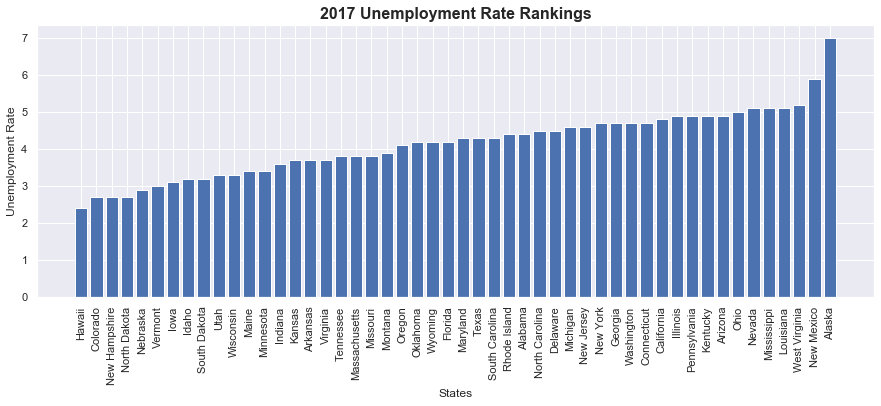

In [30]:
# sort the dataframe by a column sort by unemployment rate
df.sort_values(by='Unemployment rate 2017',inplace=True)
#set the size of the figure
plt.rcParams["figure.figsize"] = [15, 5]
#make sure the layout doesnt cut off the labels
plt.tight_layout()
plt.xlabel('States')
plt.ylabel('Unemployment Rate')
plt.title('2017 Unemployment Rate Rankings', fontsize = 16, fontweight = 'bold' )
#rotate the state names
plt.xticks(rotation=90)
#plot the barplot
plt.bar(df['Area name'],df['Unemployment rate 2017']);

Display a bar-chart of the 50 States with the highest rates on the right and lowest rates on the left side of the chart.

## Which Region in the US has the highest and lowest unemployment rate in 2017?

In [31]:
print("Unemployment Rate by Region")
dfRegionMean=dfUnemployed.groupby('Region').mean()
dfRegionMean

Unemployment Rate by Region


,Unemployment rate 2013,Unemployment rate 2014,Unemployment rate 2015,Unemployment rate 2016,Unemployment rate 2017
Region,,,,,
Midwest,5.991667,4.991667,4.275000,4.125000,3.683333
Non-Mainland,5.950000,5.650000,5.050000,4.950000,4.700000
Northeast,7.022222,5.866667,4.922222,4.377778,4.022222
South,7.112500,6.181250,5.493750,5.025000,4.431250
West,6.881818,5.836364,5.181818,4.827273,4.254545


Display a table groupby region showing the average unemployment rates spanning from 2013-2017. The table shows that the states in the Midwest has the lowest average unemployment rate overall. The highest average unemployment rate by region is South from 2013-2016, then change to Non-Mainland in 2017. We also notice the variation of the numbers in each column become smaller over time.

In [32]:
#Create dfUnemployment2017 dataframe and added the columns
dfUnemployment2017 = df[['Region','State', 'Area name', 'Unemployment rate 2017']]

#Group table by region and use describe() to view some basic statistical details like 
#percentile, mean, std etc. of a data frame
dfUnemployment2017.groupby('Region').describe()

Unemployment rate 2017                                        \
                              count      mean       std  min    25%   50%   
Region                                                                      
Midwest                        12.0  3.683333  0.766139  2.7  3.175  3.50   
Non-Mainland                    2.0  4.700000  3.252691  2.4  3.550  4.70   
Northeast                       9.0  4.022222  0.821246  2.7  3.400  4.40   
South                          16.0  4.431250  0.477101  3.7  4.200  4.35   
West                           11.0  4.254545  0.944842  2.7  3.600  4.20   

                         
               75%  max  
Region                   
Midwest       4.00  5.0  
Non-Mainland  5.85  7.0  
Northeast     4.70  4.9  
South         4.75  5.2  
West          4.85  5.9

The table shows basic statistical details for the Unemployment rate of 2017. From the table we can see the count number of states, their mean, standard deviation, min, percentiles and max.

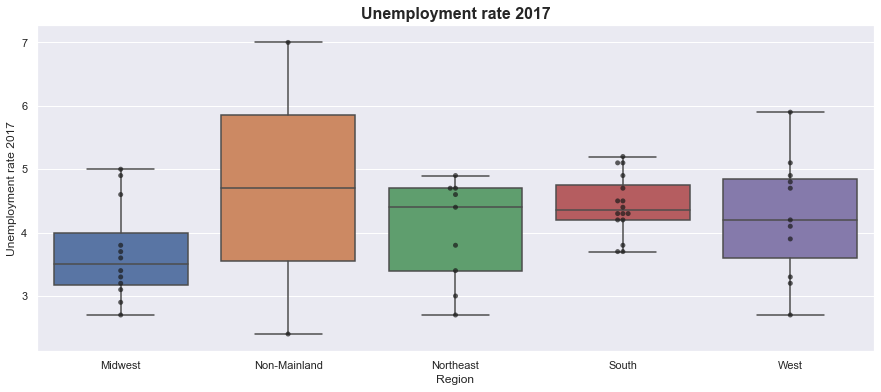

In [33]:
#Set the figure size
plt.figure(figsize=(15,6))

#Labeled and bold the title of the boxplot graph with matplotlib
plt.title('Unemployment rate 2017', fontsize=16, fontweight='bold');
 
# Create a seaborn boxplot and remove the bars inside the violins by using inner = None.
sns.boxplot(x='Region', y='Unemployment rate 2017', data=dfUnemployment2017);

#create a swarmplot with black points and slightly transparent 
sns.swarmplot(x='Region', y='Unemployment rate 2017', data=dfUnemployment2017, color='k', alpha=0.7);


Display boxplox and overlay with swarmplot to show the unemployment rates of the US by Regions. The swarmplot gives a visual representation of how many states belong to each region and where the density of states are in respect to the min, max and mean. The box represents the percentiles and outliers. We can see that the Non-Mainland states have the lowest min and the highest max from the rest of the Regions, however the Midwest also has the lowest average.

## Which states has the highest and lowest median household income in 2017?

In [34]:
#created a dataframed called dfMedianIncome to use the columns State, Area name and MEdian household 2017
dfMedianIncome = df[['Coastal or Landlocked','Region', 'State','Area name','Median Household Income 2017']]

#display the head of the dataframe sorted by highest to low.
print('Highest median household income 2017')
dfMedianIncome.sort_values(['Median Household Income 2017'], ascending = False).head()

Highest median household income 2017


,Coastal or Landlocked,Region,State,Area name,Median Household Income 2017
19,Coastal,South,MD,Maryland,80711.0
29,Coastal,Northeast,NJ,New Jersey,80106.0
10,Coastal,Non-Mainland,HI,Hawaii,77936.0
20,Coastal,Northeast,MA,Massachusetts,77385.0
6,Coastal,Northeast,CT,Connecticut,74428.0


Display a table of the top 5 states with the highest Median household income 2017.

In [35]:
#display the head of the dataframe sorted by lowest to high.
print('Lowest Median Household Income States 2017')
dfMedianIncome.sort_values(['Median Household Income 2017'], ascending = True).head()

Lowest Median Household Income States 2017


,Coastal or Landlocked,Region,State,Area name,Median Household Income 2017
47,Landlocked,South,WV,West Virginia,43238.0
23,Coastal,South,MS,Mississippi,43595.0
3,Landlocked,South,AR,Arkansas,45916.0
17,Coastal,South,LA,Louisiana,46283.0
30,Landlocked,West,NM,New Mexico,47086.0


Display a table of the top 5 states with the lowest Median household income 2017.

In [36]:
#plot the Median Income dataframe in a choropleth map
data = dict(type='choropleth',
           locations=dfMedianIncome['State'],
           locationmode='USA-states',
           colorscale='Reds',
           z=dfMedianIncome['Median Household Income 2017'],
           marker = dict(
           line = dict(color='black', width=1)
           ),
            colorbar = {'title':'Median Household Income'},
            text = dfMedianIncome['Area name']
           )
layout = dict(title="2017 Median Household Income",
             geo={'scope':'usa'}
             )
choromap_medianIncome = go.Figure(data = [data], layout= layout)
iplot(choromap_medianIncome, validate = False)

Display an interactive map of the Unite States showing the difference of median household income differentiated by color. Depending on the color, we can visually see the concentrations of states with high and low median household income.

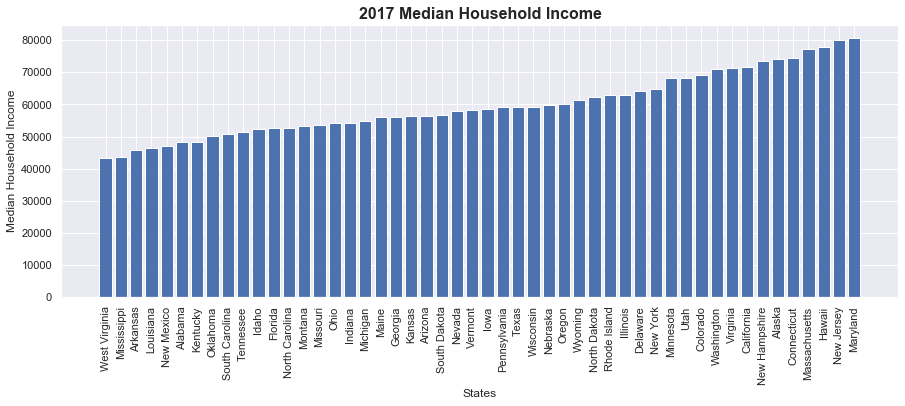

In [37]:
# sort the dataframe by a column sort by the 2017 household income
df.sort_values(by='Median Household Income 2017',inplace=True)
#set the size of the figure
plt.rcParams["figure.figsize"] = [15, 5]
#make sure the layout doesnt cut off the labels
plt.tight_layout()
plt.xlabel('States')
plt.ylabel('Median Household Income')
plt.title('2017 Median Household Income', fontsize = 16, fontweight ='bold')
#rotate the state names
plt.xticks(rotation=90)
#plot the barplot
plt.bar(df['Area name'],df['Median Household Income 2017']); 

Display a bar graph showing from lowest to highest of states with median household income in 2017. We can see the state with the highest median household income, Maryland and the state with the lowest median household income, West Virginia.

<h2> Pearson Correlation Coefficient</h2>
<h3> What can indicate a higher unemployment rate? </h3>
Let's see the correlation matrix without any categorization of the states.

In [38]:
#Created a dataframe of the following columns to see if there are any correlation
df[['Unemployment rate 2017',
    'Area in square miles - Total area',
    'Population',
    'Civilian labor force 2017',
    'Density per square mile of land area - Housing units',
    'Housing units', 
    'Median Household Income 2017',
    'Density per square mile of land area - Population']].corr()[:1] 
#we only need first row since the matrix has duplicate data

,Unemployment rate 2017,Area in square miles - Total area,Population,Civilian labor force 2017,Density per square mile of land area - Housing units,Housing units,Median Household Income 2017,Density per square mile of land area - Population
Unemployment rate 2017,1.0,0.445447,0.232753,0.21145,0.136581,0.237651,-0.174888,0.137581


We see that strongest correlate coefficient between 'Unemployment_rate_2017' is with 'Area in square miles - Total area'.
Let's see if we can see a stronger correlation by categorizing the states.

<h3>Do we see a difference in unemployment with the type of state?</h3>
Let's try grouping on the bases of a state being Coastal or Landlocked.

In [39]:
#List of columns and their correlation groupped by land type
df.groupby('Coastal or Landlocked')[['Unemployment rate 2017',
                                     'Area in square miles - Total area',
                                     'Population','Civilian labor force 2017', 'Housing units', 'Median Household Income 2017',
                                     'Density per square mile of land area - Housing units',
                                     'Density per square mile of land area - Population']].corr()[0::8]
#We only needs lines 0 and 6, thus we select the rows using [0::8]

,,Unemployment rate 2017,Area in square miles - Total area,Population,Civilian labor force 2017,Housing units,Median Household Income 2017,Density per square mile of land area - Housing units,Density per square mile of land area - Population
Coastal or Landlocked,,,,,,,,,
Coastal,Unemployment rate 2017,1.0,0.670348,0.103561,0.092321,0.095535,-0.065264,-0.046348,-0.041878
Landlocked,Unemployment rate 2017,1.0,0.114914,0.399196,0.352872,0.401409,-0.547150,0.316164,0.320215


From the correlation matrix above, we see that dividing the data into 'Coastal or Landlocked' categories shows a stronger 'Unemployment rate 2017' correlation coefficient of '0.670348' in the Coastal states with 'Area in square miles - Total area'.

Let's group the states by Region and check out the correlation coefficients.

In [40]:
#List the correlation columns groupped by region
df.groupby('Region')[['Unemployment rate 2017',
                      'Area in square miles - Total area',
                      'Population','Civilian labor force 2017',
                      'Density per square mile of land area - Housing units', 'Housing units', 'Median Household Income 2017',
                      'Density per square mile of land area - Population']].corr()[0::8]

,,Unemployment rate 2017,Area in square miles - Total area,Population,Civilian labor force 2017,Density per square mile of land area - Housing units,Housing units,Median Household Income 2017,Density per square mile of land area - Population
Region,,,,,,,,,
Midwest,Unemployment rate 2017,1.0,-0.172444,0.936027,0.919732,0.887106,0.934935,-0.299355,0.889032
Non-Mainland,Unemployment rate 2017,1.0,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Northeast,Unemployment rate 2017,1.0,0.311250,0.647539,0.646641,0.563275,0.641591,0.123898,0.573209
South,Unemployment rate 2017,1.0,-0.108719,-0.222950,-0.235003,-0.159655,-0.229776,-0.397132,-0.162035
West,Unemployment rate 2017,1.0,0.325889,0.202777,0.187222,0.201856,0.209375,-0.326090,0.195646


It looks like population size has a strong correlation with the Unemployment rate in 2017 in the __Midwest__!
The __Northeast__ seems to have a weaker, but positive correlation coefficient with Population size.
However, it looks like population size in the __South__ has a weak, but negative correlation in the South with population size. A larger population size in the South may be good to bring down unemployment according to these numbers. The __West__ does not seem to have a _strong_ enough correlation within this dataset.
_Note: Non-Mainland data is just two values, so the correlation coefficient is inaccurate."_

#### Swarmplots for Coastal or Landlocked States

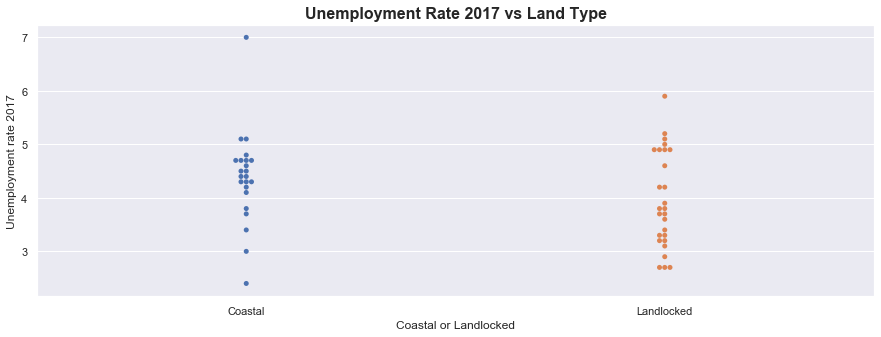

In [41]:
#display a swarmplot of coastal or landlocked versus Unemployment rate of 2017
ax = sns.swarmplot(x="Coastal or Landlocked", y="Unemployment rate 2017", data=df)
#Display a title for the plot
plt.title('Unemployment Rate 2017 vs Land Type', fontsize=16, fontweight='bold');

The swarmplot shows unemployment rate 2017 density distribution of states separated by coastal or landlocked land types. We see there is a higher density of lower unemployment rates in the landlocked states.

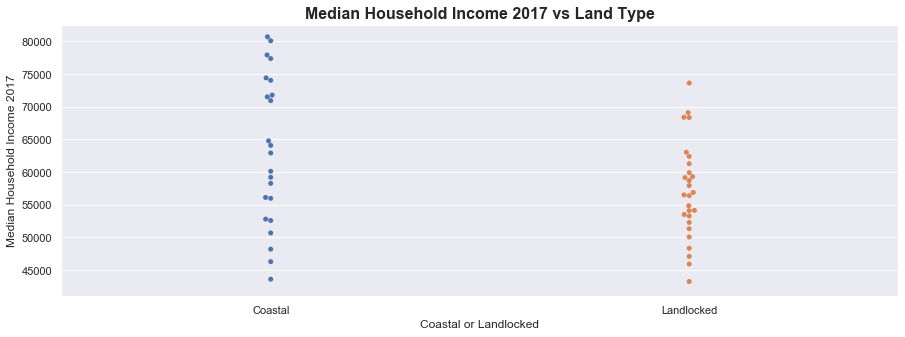

In [42]:
#Plot a swarmplot
ax = sns.swarmplot(x="Coastal or Landlocked", y="Median Household Income 2017", data=df)
#Display a title for swarmplot
plt.title('Median Household Income 2017 vs Land Type', fontsize=16, fontweight='bold');

Display a swarmplot of median household income in 2017 separated by coastal or landlocked land types. We can see the median income of Coastal land types is more spread out. This indicates the coastal land types have a higher min and max range than their landlocked counterpart. 

#### Swarmplots for Regions

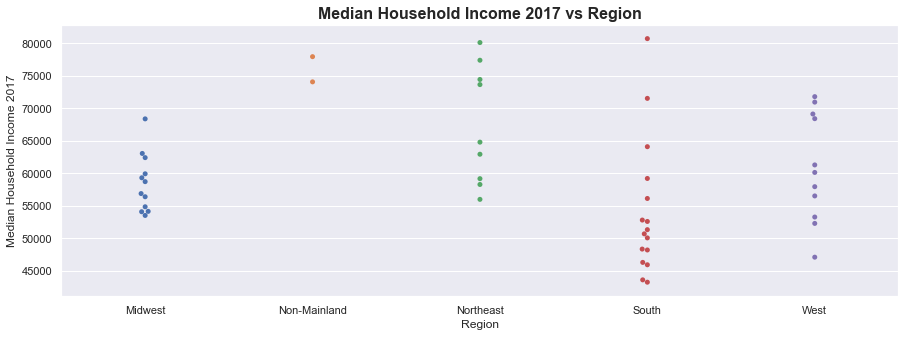

In [43]:
#created a swarmplot of regions versus median household for 2017
ax = sns.swarmplot(x="Region", y="Median Household Income 2017", data=df)
#create a title for the swarmplot
plt.title('Median Household Income 2017 vs Region', fontsize=16, fontweight='bold');

Display a swarmplot comparing median household incomes in 2017 separated by regions in the United States. This plot shows the South region has a cluster of states that are particularly lower than the rest of the regions. In contrast, there is one state in particular, Maryland, with the highest median household income that is also from the South. 

#### Boxplots for Regions

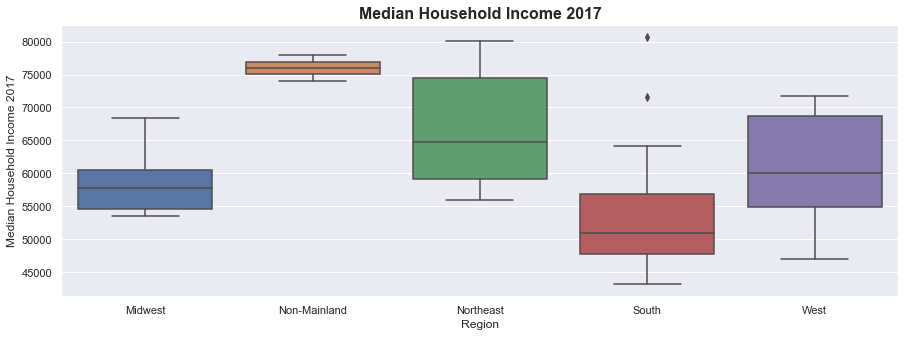

In [44]:
#created a seaborn boxplot 
sns.boxplot(x="Region", y="Median Household Income 2017", data=df);
#Labeled and bold the title of the boxplot graph
plt.title('Median Household Income 2017', fontsize=16, fontweight='bold');

Display a boxplot of Median Household Income of 2017 separated by regions. Showing the different median, minimum, maximum and outliers of the 50 states by region. For example the south has the lowest min at below 45k and two outliers on top.

#### Table for Regions

In [45]:
dfMedianIncome.groupby('Region').describe()

Median Household Income 2017                              \
                                    count          mean           std   
Region                                                                  
Midwest                              12.0  58461.416667   4471.298966   
Non-Mainland                          2.0  75997.000000   2742.160097   
Northeast                             9.0  67408.777778   9068.557490   
South                                16.0  54037.937500  10346.152144   
West                                 11.0  60791.363636   8337.503586   

                                                            
                  min      25%      50%       75%      max  
Region                                                      
Midwest       53506.0  54663.5  57788.5  60534.75  68364.0  
Non-Mainland  74058.0  75027.5  75997.0  76966.50  77936.0  
Northeast     55980.0  59165.0  64783.0  74428.00  80106.0  
South         43238.0  47715.5  50997.0  56886.50  80711.0  
West          47086.0  54885.0  60123.0  68754.00  71785.0

Display a table to describe some statistical information for median household income 2017 by region.

#### Boxplots for Coastal or Landlocked States

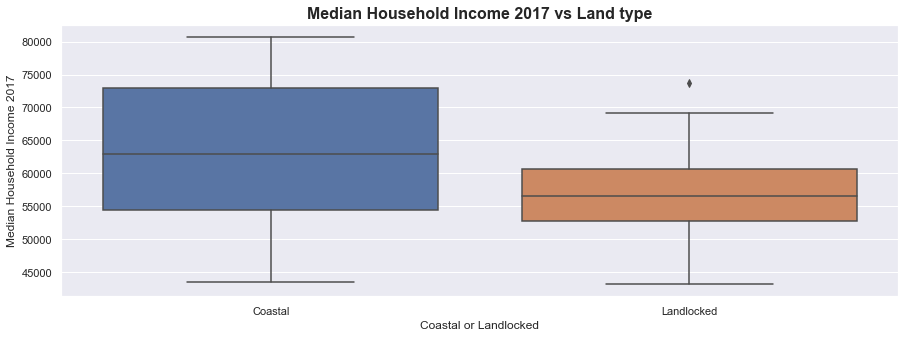

In [46]:
#created a seaborn boxplot of coastal or landlocked versus Median household Income 2017
sns.boxplot(x="Coastal or Landlocked", y="Median Household Income 2017", data=df);
#Dislay a title
plt.title('Median Household Income 2017 vs Land type', fontsize=16, fontweight='bold');

Display a boxplot showing median household income categorized by coastal states and landlocked states. In this boxplot we can see the median, quartiles, whiskers and outliers of our two category. The coastal states has a higher median household income mean than the landlocked states, yet their min is approximately the same.

In [47]:
dfMedianIncome.groupby('Coastal or Landlocked').describe()

Median Household Income 2017                \
                                             count          mean   
Coastal or Landlocked                                              
Coastal                                       23.0  63237.869565   
Landlocked                                    27.0  57001.888889   

                                                                         \
                                std      min      25%      50%      75%   
Coastal or Landlocked                                                     
Coastal                11454.713207  43595.0  54388.5  62923.0  72921.5   
Landlocked              7404.600297  43238.0  52771.0  56508.0  60596.0   

                                
                           max  
Coastal or Landlocked           
Coastal                80711.0  
Landlocked             73638.0

Display a table to show the statistical numbers - count, mean, standard deviation, min, quartiles and max.

## Pivot Tables

Data is pivoted to see the average unemployment rate by using the category 'Region' as the columns and using the different years' unemployment rate in the chart.
#### Regional Unemployment Rate by Year

In [48]:
#defining new column names as a dictionary
renamedColumns = {'Unemployment rate 2013':'2013','Unemployment rate 2014':'2014','Unemployment rate 2015':'2015','Unemployment rate 2016':'2016','Unemployment rate 2017':'2017'}
#changing column names
dfUnemployed.rename(columns=renamedColumns, inplace=True)
table = pd.pivot_table(dfUnemployed, columns='Region', values=['2013','2014','2015','2016','2017'])

#pivot years into rows and rows into bar graph
table

Region,Midwest,Non-Mainland,Northeast,South,West
2013,5.991667,5.95,7.022222,7.11250,6.881818
2014,4.991667,5.65,5.866667,6.18125,5.836364
2015,4.275000,5.05,4.922222,5.49375,5.181818
2016,4.125000,4.95,4.377778,5.02500,4.827273
2017,3.683333,4.70,4.022222,4.43125,4.254545


Display a pivot table showing unemployment rate average by years 2013-2017 and separated by regions.

In [49]:
#Create pivot table to show unemployment rate averaged by the year and the land type
table = pd.pivot_table(dfUnemployed, columns='Coastal or Landlocked', values=['2013','2014','2015','2016','2017'])
#display the pivot table 
table

Coastal or Landlocked,Coastal,Landlocked
2013,7.178261,6.348148
2014,6.217391,5.337037
2015,5.391304,4.688889
2016,4.882609,4.444444
2017,4.378261,3.955556


Display a pivot table showing unemployment rate averaged by years (2013-2017) and separated by land type.

In [50]:
#Create pivot table to show unemployment rate averaged by the year and the landtype
table = pd.pivot_table(dfUnemployed, columns='Coastal or Landlocked', index='Region', values=['2013','2014','2015','2016','2017'])
#display the pivot table and renamed the NaN into N/A because those states do not exist.
table.fillna('N/A')

2013                2014                2015  \
Coastal or Landlocked  Coastal Landlocked  Coastal Landlocked  Coastal   
Region                                                                   
Midwest                    N/A    5.99167      N/A    4.99167      N/A   
Non-Mainland              5.95        N/A     5.65        N/A     5.05   
Northeast              7.24286       6.25  6.08571        5.1  5.08571   
South                  7.15455       7.02  6.24545       6.04  5.53636   
West                   7.93333     6.4875      6.8      5.475      5.8   

                                     2016                2017             
Coastal or Landlocked Landlocked  Coastal Landlocked  Coastal Landlocked  
Region                                                                    
Midwest                    4.275      N/A      4.125      N/A    3.68333  
Non-Mainland                 N/A     4.95        N/A      4.7        N/A  
Northeast                   4.35  4.44286       4.15  4.08571        3.8  
South                        5.4  5.06364       4.94  4.46364       4.36  
West                        4.95      5.2     4.6875  4.53333       4.15

Display a combined pivot table of region and land types to further separate the unemployment rate over the years. Some data showed up as NaNs but renamed to N/A because in our case it isn't applicable. For example, since the Midwest doesn't have any land that touch the sea, it is not applicable.

## Is unemployment increasing or decreasing over the years?
## Built-in methods of the DataFrame object

In [51]:
#used to view some basic statistical details like percentile, mean, std etc. of a data frame
dfUnemployed.describe()

,2013,2014,2015,2016,2017
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.730000,5.742000,5.012000,4.646000,4.150000
std,1.534667,1.261856,1.057073,0.986275,0.898127
min,2.900000,2.700000,2.800000,2.900000,2.400000
25%,5.475000,4.725000,4.225000,3.925000,3.450000
50%,6.900000,6.000000,5.050000,4.800000,4.250000
75%,7.775000,6.675000,5.950000,5.300000,4.700000
max,9.600000,7.900000,6.800000,6.900000,7.000000


Display a table to show basic statistical information over the years (2013-2017).

In [52]:
#variance for the unemployment dataframe
variance=dfUnemployed.var()
print(variance)

2013    2.355204
2014    1.592282
2015    1.117404
2016    0.972739
2017    0.806633
dtype: float64


Display a table of the variance of unemployment rate of 2013-2017. We see that there was a higher variance in 2013 and the number got smaller over time.

In [53]:
#find the mean of the columns and assign it to mean
mean = dfUnemployed.mean()
mean

2013    6.730
2014    5.742
2015    5.012
2016    4.646
2017    4.150
dtype: float64

Display the mean of the unemployment rate over the years (2013-2017). We can see from the list that on average the unemployment rate is dropping.

In [54]:
#Displays the standard deviation of the unemployment rate from 2013-2017
dfUnemployed.std()

2013    1.534667
2014    1.261856
2015    1.057073
2016    0.986275
2017    0.898127
dtype: float64

Display the standard deviation of the unemployment rate over the years (2013-2017). We can see the standard deviation number is also decreasing.

In [63]:
#Display the median of the unemployment rate 2013-2017
dfUnemployed.median()

2013    6.90
2014    6.00
2015    5.05
2016    4.80
2017    4.25
dtype: float64

In [55]:
#import scipy for statistics
from scipy import stats

#applied the min, max, mean, variance, skewness and Kurtosis to the unemployment rate from 2013-2017

#In the respective order the output reflects the min/max, mean, variance, skewness and kurtosis
#represented by the years.
print('2013:',stats.describe(dfUnemployed['2013']),'\n')
print('2014:',stats.describe(dfUnemployed['2014']),'\n')
print('2015:',stats.describe(dfUnemployed['2015']),'\n')
print('2016:',stats.describe(dfUnemployed['2016']),'\n')
print('2017:',stats.describe(dfUnemployed['2017']))

2013: DescribeResult(nobs=50, minmax=(2.9, 9.6), mean=6.729999999999999, variance=2.355204081632653, skewness=-0.42683819341143214, kurtosis=-0.379585407020016) 

2014: DescribeResult(nobs=50, minmax=(2.7, 7.9), mean=5.742000000000001, variance=1.592281632653061, skewness=-0.4676599142675093, kurtosis=-0.6367180634542899) 

2015: DescribeResult(nobs=50, minmax=(2.8, 6.8), mean=5.012, variance=1.117404081632653, skewness=-0.2592359074640734, kurtosis=-0.9050111760866115) 

2016: DescribeResult(nobs=50, minmax=(2.9, 6.9), mean=4.646, variance=0.9727387755102039, skewness=0.0002250569990021411, kurtosis=-0.6200196197433097) 

2017: DescribeResult(nobs=50, minmax=(2.4, 7.0), mean=4.15, variance=0.8066326530612244, skewness=0.34949927349029825, kurtosis=0.6192631426078421)


Using scipy for statistic, we can pull up some built-in statistical data that includes minmax, mean, variance, skewness and kurtosis.

## Is there a significant change in unemployment rate over the years? 

#### How does Unemployment Distribution looks through the years

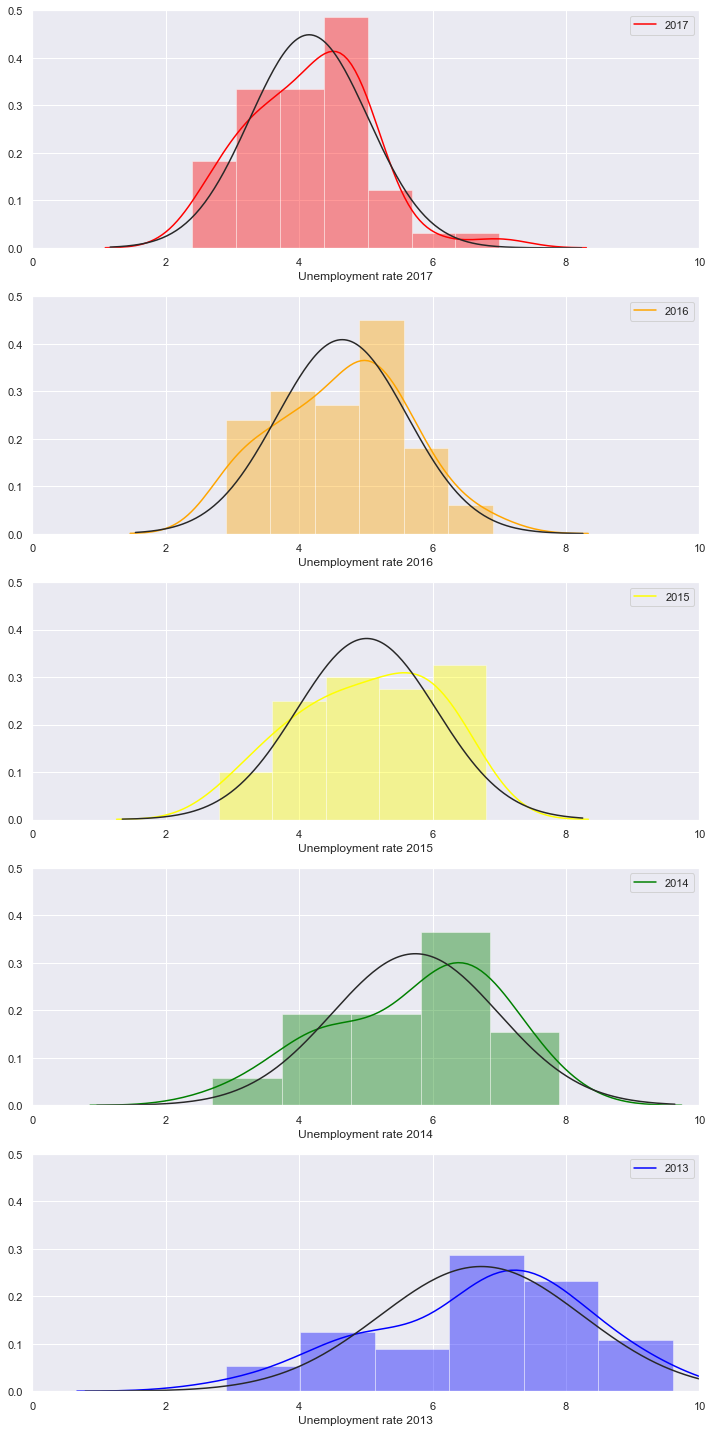

In [56]:
#import norm from scipy to superimpose a normal distribution onto the dataset for each year
from scipy.stats import norm

#Created subplots to plot the distribution of unemployment rate from 2013-2017 with kernal density estimate
#created figure size and the amount of rows and columns for the subplots

fig, axes = plt.subplots(nrows=5, ncols=1 ,figsize = (10,20))
#set the property on the artist type object regarding x and y limits 
plt.setp(axes, xlim=(0,10), ylim=(0,0.5))
#Using axes to plot each plot in their subplot with differentcolor
sns.distplot(dfUnemployed[['2017']], color = 'red', kde_kws={"label":"2017"}, axlabel ='Unemployment rate 2017', 
             ax=axes[0], fit=norm);
sns.distplot(dfUnemployed[['2016']], color = 'orange',kde_kws={"label":"2016"}, axlabel ='Unemployment rate 2016',
             ax=axes[1], fit=norm);
sns.distplot(dfUnemployed[['2015']], color = 'yellow', kde_kws={"label":"2015"}, axlabel ='Unemployment rate 2015', 
             ax=axes[2], fit=norm);
sns.distplot(dfUnemployed[['2014']], color = 'green', kde_kws={"label":"2014"}, axlabel ='Unemployment rate 2014',
             ax=axes[3], fit=norm );
sns.distplot(dfUnemployed[['2013']], color = 'blue', kde_kws={"label":"2013"}, axlabel ='Unemployment rate 2013',
             ax=axes[4], fit=norm);



#To prevent labels from being cut off by surrounding subplots
plt.tight_layout()


We see that the unemployment mean of each year decreases as time goes on. Also we see the all the tables are skewed and not normally distributed but somewhat close to normal distribution. According to the skewness stats, 2016 is the least skewed and matches the best with the normal distribution curve.

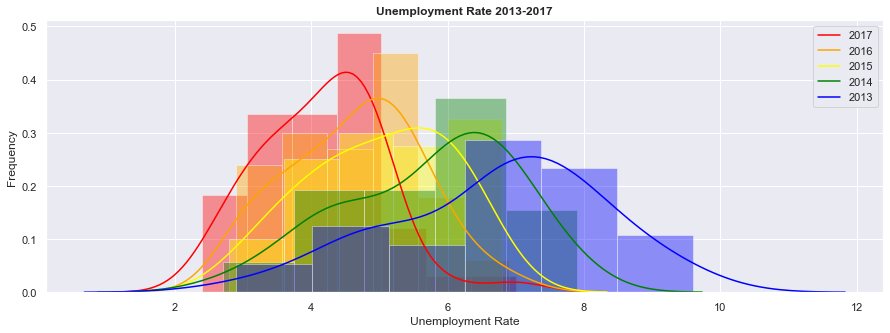

In [57]:
#Used one distribution plot to show how the data was distributed in 5 years with kernal density estimate
sns.distplot(dfUnemployed[['2017']], color = 'red', kde_kws={"label":"2017"});
sns.distplot(dfUnemployed[['2016']], color = 'orange',kde_kws={"label":"2016"});
sns.distplot(dfUnemployed[['2015']], color = 'yellow', kde_kws={"label":"2015"});
sns.distplot(dfUnemployed[['2014']], color = 'green', kde_kws={"label":"2014"});
sns.distplot(dfUnemployed[['2013']], color = 'blue', kde_kws={"label":"2013"});

#labeling and titled the distribution plot
plt.title('Unemployment Rate 2013-2017', fontsize = 12, fontweight = 'bold');
plt.xlabel('Unemployment Rate');
plt.ylabel('Frequency');

Plotted an overlay of unemployment rate distributions from 2013-2017. We see that unemployment is decreasing over time.

## Is the unemployment and civilian labor force correlated?

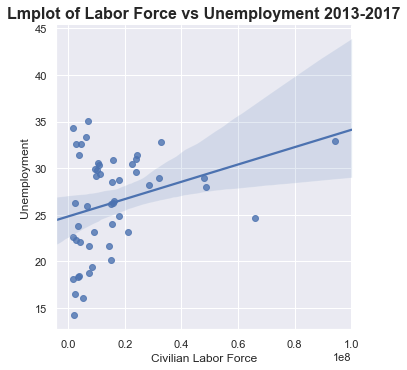

In [58]:
#concatenating civilian labor force from 2013-2017 into one dataframe column
CivilianLaborForce = df['Civilian labor force 2017']+df['Civilian labor force 2016']+df['Civilian labor force 2015']+df['Civilian labor force 2014']+df['Civilian labor force 2013']

#concatenating unemployment from 2013-2017 into one dataframe column
Unemployment = df['Unemployment rate 2017']+df['Unemployment rate 2016']+df['Unemployment rate 2015']+df['Unemployment rate 2014']+df['Unemployment rate 2013']

#created the dataframe df3 and combined the data from the dataframe and concatenated columns                                                  
df3=pd.DataFrame(data=CivilianLaborForce)
df3['Unemployment']=pd.DataFrame(data=Unemployment)
df3.rename(columns={0:'Civilian Labor Force'}, inplace=True)

#plot a lmplot to show if the dataset shows a linear pattern.
sns.lmplot(data=df3, y='Unemployment', x='Civilian Labor Force');

#set the title of the lmplot
plt.title('Lmplot of Labor Force vs Unemployment 2013-2017', fontsize=16, fontweight='bold');

Display a lmplot of civilian labor force of 2013-2017 and unemployment rate of 2013-2017. We see a slight correlation between unemployment and civilian labor force.

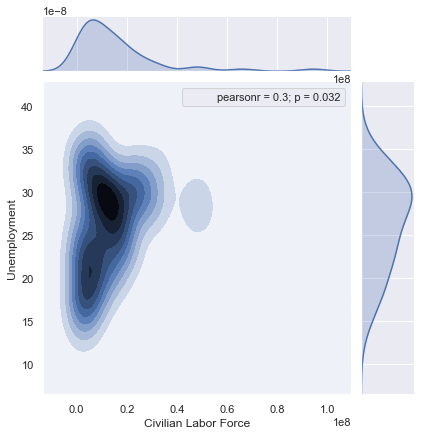

In [59]:
#import pearson r from scipy.stats
from scipy.stats import pearsonr

#plot a joinplot with unemployment rate of 2013-2017 with civilian labor force 2013-2017 and included a 
#pearson r function with kde
sns.jointplot(y="Unemployment", x="Civilian Labor Force", data=df3, stat_func=pearsonr, kind='kde');


Display a joinplot with a Pearson r value of 0.3. According to the plot there is a very weak but positive correlation between unemployment rate from 2013-2017 and the civilian labor force of 2013-2017.

## Hypothesis Testing

### Yearly Unemployment Rate Testing
Unemployment rate is changing between 2013 and 2017. Let's test this. Our sample size is the same size over the many years, so we can use the ANOVA test. <br/>
$H_{0}$: The Unemployment rate between each year remains the same. <br/>
$H_{a}$: The Unemployment rate is changing with the years.

In [60]:
#Reference for how I found this test is here:
#  https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
#import required libraries
from scipy import stats

#f_oneway is to test for the p value
Ftest, pval = stats.f_oneway(dfUnemployed['2017'],
                             dfUnemployed['2016'],
                             dfUnemployed['2015'],
                             dfUnemployed['2014'],
                             dfUnemployed['2013']
                            )
print("P-value:",pval)

P-value: 2.9842985293708143e-24


Since the p-value is way under 0.05, there is a very strong evidence against the null hypothesis in favor of the alternative. We can accept that the difference between the years are significant.<br><br>
Therefore we __reject the null hypothesis in favor of the alternative hypothesis.__

### Coastal vs Landlocked Income Testing
<br/>
States can be one of two categories, 'Coastal' or 'Landlocked.' We can test for the p-value using a two-sample T-test since both categories are under 30 data values each.
<br/>
$H_{0}$: There is no difference in mean of median income between Coastal and Landlocked states. <br/>
$H_{a}$: There is a difference in mean of median income between Coastal and Landlocked states.

In [61]:
#import library to bring in the T-test
from scipy.stats import ttest_ind

#running the T-test with coastal or landlocked column with median household income
ttest, pval = ttest_ind(df[df['Coastal or Landlocked']=='Coastal']['Median Household Income 2017'],
                        df[df['Coastal or Landlocked']=='Landlocked']['Median Household Income 2017'])
print('P-value:',pval)

P-value: 0.02471767208015501


Since the p-value ~ 0.024 and it is between 0.01 < P < 0.05, we can accept that the difference between the coastal and landlocked state incomes are moderately significant against the null hypothesis in favor of the alternative.<br><br>
Therefore we __still reject the null hypothesis in favor of the alternative__.

### Coastal vs Landlocked Unemployment 2017 Testing
<br/>
States can be one of two categories, 'Coastal' or 'Landlocked.' We can test for the p-value using a two-sample T-test since both categories are under 30 data values each.
<br/>
$H_{0}$: There is no difference in mean of unemployment between Coastal and Landlocked states. <br/>
$H_{a}$: There no difference in mean of unemployment between Coastal and Landlocked states.

In [62]:
#import library to bring in the T-test
from scipy.stats import ttest_ind

#Running the T-Test with coastal or landlocked column with unemployment rate
ttest, pval = ttest_ind(df[df['Coastal or Landlocked']=='Coastal']['Unemployment rate 2017'],
                        df[df['Coastal or Landlocked']=='Landlocked']['Unemployment rate 2017'])
print('P-value:',pval)

P-value: 0.0975552931256076


Since the p-value ~ 0.0975 and it is between 0.05 < P < 0.10, we can accept that the difference between the coastal and landlocked states incomes evidence is weak against the null hypothesis in favor of the alternative.<br><br>
Therefore we __failed to reject the null hypothesis and cannot accept the alternative hypothesis__.

## Conclusion

After cleaning, organizing, plotting and data visualization we were able to answer the following questions: 
1. <b> Which states have the highest and lowest unemployment rate in 2017? </b> <br>
Alaska has the Highest unemployment rate in 2017 with 7.0%.<br>
Hawaii has the Lowest unemployment rate in 2017 with 2.4%.<br><br>
2. <b> Which region have the highest and lowest unemployment rate in 2017? </b> <br>
Non-Mainland has the Highest unemployment rate in 2017 based on region with a mean of 4.7%.<br>
Midwest has the Lowest unemployment rate in 2017 based on region with a mean of 3.68%.<br><br>
3. <b> Which states has the highest and lowest median household income in 2017? </b><br>
Maryland has the highest median household income in 2017 with 80,711.<br>
West Virginia has the lowest median household income in 2017 with 43,238.<br><br>
4. <b> What land factors can indicate a higher unemployment rate? </b><br>
In 2017, the largest correlation to unemployment was state area size. Coastal states showed a stronger correlation coefficient between state area size and unemployment rate in 2017. Population size indicates a stronger correlation coefficient for unemployment in states in the Midwest. However, states in the South showed a weak negative correlation coefficient--this means that a larger population size in the South correlates with a lower unemployment rate.<br><br>
5. <b> Is there a significant change in unemployment rate over the course of 5 years?  </b><br>
The differences in unemployment rate between the years is have been significant. We saw the change from mean, variance and standard deviation and the numbers are getting smaller which means unemployment rate has been decreasing. The variance between the states have also been decreasing and the same with standard deviation. <br><br>
6. <b> Is the unemployment and civilian labor force correlated?</b><br>
As civilian labor force increases, which is expected from a growing population, unemployment rate may increase for all states as seen by the weak correlation in our lmplot.<br><br>
7. <b> Is unemployment changing over time? </b><br>
The data shows a very significant change of unemployment rate over time.<br><br>
8. <b> Is there a difference in median household income between Coastal and Landlocked states?</b><br>
The data shows a moderate significance of median household income between coastal and landlocked states. We think, from the data we saw, that there is a positive difference between them.<br><br>
9. <b> Is there a difference in unemployment rate between Coastal and Landlocked states? </b><br>
There is no significant difference in unemployment rates between coastal and landlocked states.
